In [23]:
import os
import csv
import numpy as np
from ultralytics import YOLO  

def test_validation(weights_folder, output_csv, data_path):
    # Initialize an empty list to store results
    metrics_data = []

    # Iterate through all the model files in the folder
    for model_file in os.listdir(weights_folder):
        if model_file.endswith(".pt"):  # Ensure it's a YOLO weight file
            model_path = os.path.join(weights_folder, model_file)
            print(f"Validating model: {model_file}")
            
            # Load the model and validate
            try:
                model = YOLO(model_path)  # Load YOLO model
                metrics = model.val(data=data_path, name = model_file)  # Perform validation
                
                # Append metrics to the list
                metrics_data.append({
                    'model': model_file,
                    'mAP50-95': np.round(metrics.box.map, 2),
                    'mAP50': np.round(metrics.box.map50, 2),
                    'mAP75': np.round(metrics.box.map75, 2),
                    'Precision': np.round(metrics.box.p, 2),
                    'Recall': np.round(metrics.box.r, 2)
                })
            except Exception as e:
                print(f"Error validating model {model_file}: {e}")
                continue

    # Write the results to a CSV file
    with open(output_csv, mode="w", newline="") as file:
        writer = csv.DictWriter(file, fieldnames=["model", "mAP50-95", "mAP50", "mAP75", "Precision", "Recall"])
        writer.writeheader()
        writer.writerows(metrics_data)

    print(f"Validation results saved to {output_csv}")


In [24]:
# Define the folder containing the YOLOv11 weights
weights_folder = "/home/wildmosquit0/git/bestModel/test_different_models"
output_csv = "/home/wildmosquit0/git/bestModel/test_different_models/validation_results.csv"
data_path = "/home/wildmosquit0/git/playfraound/val_models.yaml"  # Path to the dataset file


In [25]:
test_validation(weights_folder,output_csv,data_path)

Validating model: batch_3.pt
Ultralytics 8.3.58 🚀 Python-3.9.21 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /home/wildmosquit0/git/model_exp/setups/seperate/640X640/labels/val.cache... 48 images, 3 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:02<00:04,  2.10s/it]


KeyboardInterrupt: 

In [27]:
!pip install sahi

In [75]:
from sahi import AutoDetectionModel
import cv2

model = "/home/wildmosquit0/git/bestModel/test_different_models/sahi_l_1_more_300e_200.pt"
source = "/home/wildmosquit0/git/model_exp/setups/seperate/water/images/val"
device="cuda:0"
detection_model = AutoDetectionModel.from_pretrained(
    model_type="yolov8",
    model_path=model,
    confidence_threshold=0.3,
    device=device
)

In [8]:
from sahi.predict import get_prediction
from sahi.predict import get_sliced_prediction
from ultralytics import YOLO
import os

# SAHI Prediction with your specific arguments

model = "/home/wildmosquit0/git/bestModel/test_different_models/sahi_l_1_more_300e_200.pt"
source = "/home/wildmosquit0/git/model_exp/setups/seperate/640X640/images/val/video_2025-01-20_14-49-56_frame_112085.jpg"

results = get_sliced_prediction(
    source,  # Pass the PIL Image instead of path
    detection_model,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

Performing prediction on 1 slices.


Performing prediction on 1 slices.


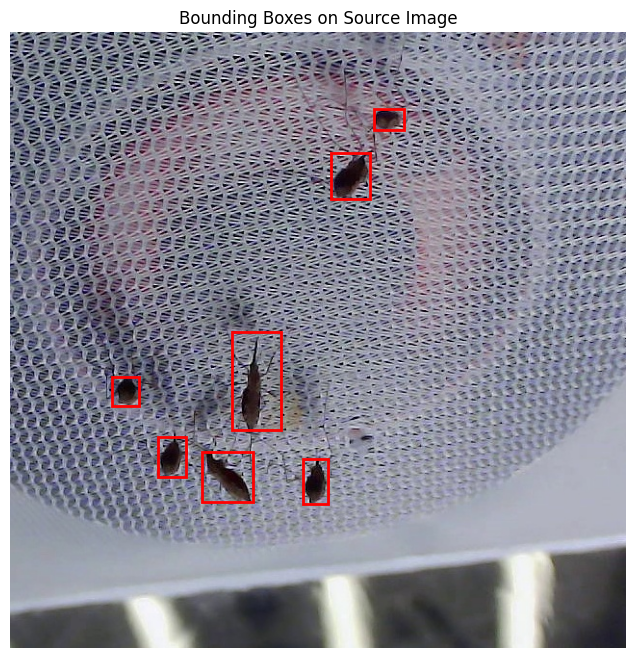

In [70]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Load the source image using OpenCV
source_img_path = "/home/wildmosquit0/git/model_exp/setups/seperate/640X640/images/val/C1_R3_frame_11698.jpg"
source = "/home/wildmosquit0/git/model_exp/setups/seperate/640X640/images/val/C1_R3_frame_11698.jpg"



results = get_sliced_prediction(
    source,  # Pass the PIL Image instead of path
    detection_model,
    slice_height=640,
    slice_width=640,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

image = cv2.imread(source_img_path)

# Check if image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at {source_img_path}")

# Convert image to RGB (OpenCV loads in BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)

# Plot bounding boxes on the image
for bbox in results.object_prediction_list:
    b = bbox.bbox.to_xywh()
    x, y, w, h = b
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Labels
ax.set_title("Bounding Boxes on Source Image")
ax.axis("off")  # Hide axis

# Show plot
plt.show()


In [60]:
import os
import csv
import cv2
from sahi.predict import get_sliced_prediction
from sahi import AutoDetectionModel

# -----------------------------
# Configuration
# -----------------------------
MODEL_PATH = "/home/wildmosquit0/git/bestModel/test_different_models/sahi_l_1_more_300e_200.pt"
# SOURCE can be a directory or a single file (image or video).
SOURCE = "/home/wildmosquit0/git/model_exp/setups/seperate/640X640/images/val/video_2025-01-20_14-49-56_frame_112085.jpg"
CSV_OUTPUT = os.path.join(os.path.dirname(SOURCE), "predictions.csv")
DEVICE = "cuda:0"
CONFIDENCE_THRESHOLD = 0.3



# -----------------------------
# Model Loading
# -----------------------------
def load_model(model_path=MODEL_PATH, device=DEVICE, confidence_threshold=CONFIDENCE_THRESHOLD):
    """
    Load the detection model from a pretrained checkpoint.
    """
    detection_model = AutoDetectionModel.from_pretrained(
        model_type="yolov8",
        model_path=model_path,
        confidence_threshold=confidence_threshold,
        device=device
    )
    return detection_model

# -----------------------------
# File Utilities
# -----------------------------
def get_file_list(source):
    """
    Retrieve a list of full file paths and base names from the source.

    If the source is a directory, list all files inside.
    If the source is a file, return a list containing only that file.

    Returns:
        file_list (list): List of complete file paths.
        base_names (list): List of filenames without extensions.
    """
    if os.path.isdir(source):
        filenames = os.listdir(source)
        file_list = [os.path.join(source, f) for f in filenames]
        base_names = [os.path.splitext(f)[0] for f in filenames]
    elif os.path.isfile(source):
        file_list = [source]
        base_names = [os.path.splitext(os.path.basename(source))[0]]
    else:
        raise ValueError(f"Source {source} is neither a valid file nor a directory.")
    return file_list, base_names

# -----------------------------
# Prediction Functions
# -----------------------------
def sahi_predict(image_input, detection_model, slice_height=640, slice_width=640,
                 overlap_height_ratio=0.2, overlap_width_ratio=0.2):
    """
    Perform sliced prediction on an image using SAHI.

    Parameters:
        image_input: File path (str) or NumPy array of the image.
        detection_model: Loaded detection model.
        slice_height (int): Height of slices.
        slice_width (int): Width of slices.
        overlap_height_ratio (float): Overlap ratio in height.
        overlap_width_ratio (float): Overlap ratio in width.

    Returns:
        object_prediction_list: List of detected objects.
    """
    result = get_sliced_prediction(
        image=image_input,
        detection_model=detection_model,
        slice_height=slice_height,
        slice_width=slice_width,
        overlap_height_ratio=overlap_height_ratio,
        overlap_width_ratio=overlap_width_ratio
    )
    return result.object_prediction_list

def extract_predictions(image, object_predictions, source_identifier, frame_index=None):
    """
    Extract prediction details from the SAHI object prediction list.

    Parameters:
        image (np.array): The image as a NumPy array.
        object_predictions (list): List of prediction objects from SAHI.
        source_identifier (str): Identifier for the source (e.g., file name).
        frame_index (int, optional): Frame index if processing a video; otherwise None.

    Returns:
        predictions (list): A list of tuples containing:
            (box_idx, x, y, w, h, confidence, source_identifier, frame_index, img_height, img_width)
    """
    img_height, img_width = image.shape[:2]
    predictions = []
    for idx, obj_pred in enumerate(object_predictions):
        # Get bounding box coordinates in (x, y, w, h) format.
        x, y, w, h = obj_pred.bbox.to_xywh()
        confidence = obj_pred.score.value
        predictions.append((idx, x, y, w, h, confidence, source_identifier, frame_index, img_height, img_width))
    return predictions

# -----------------------------
# Video Processing
# -----------------------------
def process_video(video_path, detection_model):
    """
    Process a video file frame by frame with a specified frame stride.

    Parameters:
        video_path (str): Path to the video file.
        detection_model: Loaded detection model.

    Returns:
        all_predictions (list): Aggregated list of prediction tuples from all processed frames.
    """
    all_predictions = []
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Failed to open video file: {video_path}")
        return all_predictions

    frame_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process only frames that meet the stride condition.
        if frame_index % VIDEO_FRAME_STRIDE != 0:
            frame_index += 1
            continue

        object_predictions = sahi_predict(frame, detection_model)
        # Use the video file's base name as source identifier.
        source_id = os.path.basename(video_path)
        preds = extract_predictions(frame, object_predictions, source_id, frame_index=frame_index)
        all_predictions.extend(preds)
        frame_index += 1

    cap.release()
    return all_predictions

# -----------------------------
# NMS (Non-Maximum Suppression) Functions
# -----------------------------
def compute_iou(box1, box2):
    """
    Compute the Intersection over Union (IoU) of two bounding boxes.
    Boxes are defined as (x, y, w, h).
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Convert to (x1, y1, x2, y2)
    box1_x1, box1_y1, box1_x2, box1_y2 = x1, y1, x1 + w1, y1 + h1
    box2_x1, box2_y1, box2_x2, box2_y2 = x2, y2, x2 + w2, y2 + h2

    inter_x1 = max(box1_x1, box2_x1)
    inter_y1 = max(box1_y1, box2_y1)
    inter_x2 = min(box1_x2, box2_x2)
    inter_y2 = min(box1_y2, box2_y2)

    if inter_x2 < inter_x1 or inter_y2 < inter_y1:
        return 0.0

    inter_area = (inter_x2 - inter_x1) * (inter_y2 - inter_y1)
    area1 = w1 * h1
    area2 = w2 * h2

    iou = inter_area / float(area1 + area2 - inter_area)
    return iou

def nms_for_group(predictions, iou_threshold):
    """
    Apply non-maximum suppression (NMS) to a list of predictions.
    
    Parameters:
        predictions (list): List of prediction tuples for a single image/frame.
        iou_threshold (float): IoU threshold for suppression.
    
    Returns:
        keep (list): List of prediction tuples kept after NMS.
    """
    # Sort predictions by confidence (index 5) in descending order.
    sorted_preds = sorted(predictions, key=lambda x: x[5], reverse=True)
    keep = []
    
    while sorted_preds:
        current = sorted_preds.pop(0)
        keep.append(current)
        filtered_preds = []
        for pred in sorted_preds:
            # Compare current box with each candidate.
            iou = compute_iou((current[1], current[2], current[3], current[4]),
                              (pred[1], pred[2], pred[3], pred[4]))
            if iou < iou_threshold:
                filtered_preds.append(pred)
        sorted_preds = filtered_preds
    return keep

def apply_nms(predictions, iou_threshold):
    
    grouped = {}
    for pred in predictions:
        key = (pred[6], pred[7])  # (source_identifier, frame_index)
        grouped.setdefault(key, []).append(pred)
    
    final_preds = []
    for key, preds in grouped.items():
        nms_preds = nms_for_group(preds, iou_threshold)
        final_preds.extend(nms_preds)
    return final_preds

# -----------------------------
# CSV Saving Function
# -----------------------------
def save_predictions_to_csv(predictions, csv_file_path):
    
    headers = ['box_idx', 'x', 'y', 'w', 'h', 'confidence', 'source_identifier', 'frame_index', 'img_height', 'img_width']
    with open(csv_file_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(headers)
        for pred in predictions:
            writer.writerow(pred)
    print(f"Predictions saved to {csv_file_path}")

# -----------------------------
# Main Processing Function
# -----------------------------
def run_command(source, model_path=MODEL_PATH):
    
    detection_model = load_model(model_path=model_path)
    file_list, _ = get_file_list(source)
    all_predictions = []

    for file_path in file_list:
        file_lower = file_path.lower()
        # Check for common video extensions.
        is_video = file_lower.endswith(('.mp4', '.avi', '.mov', '.mkv'))
        
        if is_video:
            print(f"Processing video: {file_path}")
            video_preds = process_video(file_path, detection_model)
            all_predictions.extend(video_preds)
        else:
            print(f"Processing image: {file_path}")
            image = cv2.imread(file_path)
            if image is None:
                print(f"Warning: Unable to read image {file_path}")
                continue
            object_predictions = sahi_predict(image, detection_model)
            preds = extract_predictions(image, object_predictions, os.path.basename(file_path), frame_index=None)
            all_predictions.extend(preds)

    # Sort predictions by source_identifier (alphabetically).
    all_predictions.sort(key=lambda x: x[6])
    # Apply Non-Maximum Suppression (NMS) to remove overlapping detections.
    all_predictions = apply_nms(all_predictions, NMS_IOU_THRESHOLD)
    return all_predictions




In [62]:
MODEL_PATH = "/home/wildmosquit0/git/bestModel/test_different_models/sahi_l_1_more_300e_200.pt"
# SOURCE can be a directory or a single file (image or video).
SOURCE = "/home/wildmosquit0/git/model_exp/peers/3-2-2023_rep2.mov"
CSV_OUTPUT = os.path.join(os.path.dirname(SOURCE), "predictions.csv")
DEVICE = "cuda:0"


# New configuration for video stride and NMS IoU threshold:
CONFIDENCE_THRESHOLD = 0.3
VIDEO_FRAME_STRIDE = 100       # Process every frame; change to e.g. 5 to process every 5th frame.
NMS_IOU_THRESHOLD = 0.5      # IoU threshold for non-max suppression.


if __name__ == "__main__":
    predictions = run_command(SOURCE)
    save_predictions_to_csv(predictions, CSV_OUTPUT)

Processing video: /home/wildmosquit0/git/model_exp/peers/3-2-2023_rep2.mov
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing prediction on 8 slices.
Performing pred

47.279388427734375